In [14]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib
import seaborn as sns

# 각 라이브러리 버전 출력
print("Numpy version:", np.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Numpy version: 1.26.4
Scikit-learn version: 1.4.2
Pandas version: 2.2.2
Matplotlib version: 3.8.4
Seaborn version: 0.13.2


In [15]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
import sys
import os
import pandas as pd

# 현재 작업 디렉토리 경로를 가져와 shared codes 폴더의 위치를 sys.path에 추가합니다.
# sys.path에 추가된 경로에 있는 py 폴더는 임포트할 수 있다.
current_dir = os.getcwd()
shared_codes_dir = os.path.join(current_dir, '../shared codes')
sys.path.append(shared_codes_dir)


# cover_nan 모듈을 임포트
from cover_nan import missing_value_removal_function

# 원본 train 데이터 로드
train = pd.read_csv("../shared codes/data/train.csv").drop(columns=['ID'])
test = pd.read_csv("../shared codes/data/test.csv")
test_id = test["ID"]
test= test.drop(columns=["ID"])

# missing_value_removal_function 사용
train = missing_value_removal_function(train)
test = missing_value_removal_function(test)

✅ '대리모 여부' 결측값을 최빈값 (0.0) 으로 대체 완료!
✅ 컬럼 삭제 완료: ['PGD 시술 여부', 'PGS 시술 여부']
✅ '대리모 여부' 결측값을 최빈값 (0.0) 으로 대체 완료!
✅ 컬럼 삭제 완료: ['PGD 시술 여부', 'PGS 시술 여부']


c:\Users\hoyeong\Desktop\6기\코드\호영\../shared codes\cover_nan.py:97: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['난자 출처'].replace('알 수 없음','본인 제공', inplace=True)
c:\Users\hoyeong\Desktop\6기\코드\호영\../shared codes\cover_nan.py:103: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [17]:
X = train.drop('임신 성공 여부', axis=1)
y = train['임신 성공 여부']

In [18]:
columns_fill_zero = [
    # 'PGD 시술 여부', 'PGS 시술 여부',
    '착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부'
]
X[columns_fill_zero] = X[columns_fill_zero].fillna(0)
test[columns_fill_zero] = test[columns_fill_zero].fillna(0)

In [19]:

X['난자 채취 경과일'].fillna(1, inplace=True)
X['난자 해동 경과일'].fillna(0, inplace=True)
X['난자 혼합 경과일'].fillna(0, inplace=True)
X['배아 이식 경과일'].fillna(0, inplace=True)
X['배아 해동 경과일'].fillna(0, inplace=True)

test['난자 채취 경과일'].fillna(1, inplace=True)
test['난자 해동 경과일'].fillna(0, inplace=True)
test['난자 혼합 경과일'].fillna(0, inplace=True)
test['배아 이식 경과일'].fillna(0, inplace=True)
test['배아 해동 경과일'].fillna(0, inplace=True)

# 병합할 칼럼들
columns_to_merge = [
    '난자 채취 경과일', '난자 해동 경과일', '난자 혼합 경과일',
    '배아 이식 경과일', '배아 해동 경과일'
]

# 새로운 칼럼 생성: 각 경과일의 합
X['총 경과일'] = X[columns_to_merge].sum(axis=1)

# 기존 칼럼 제거
X = X.drop(columns=columns_to_merge)

# 새로운 칼럼 생성: 각 경과일의 합
test['총 경과일'] = test[columns_to_merge].sum(axis=1)

# 기존 칼럼 제거
test = test.drop(columns=columns_to_merge)

C:\Users\hoyeong\AppData\Local\Temp\ipykernel_29772\1085533716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['난자 채취 경과일'].fillna(1, inplace=True)
C:\Users\hoyeong\AppData\Local\Temp\ipykernel_29772\1085533716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [20]:
# Categorical(범주형) 칼럼 찾기
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_columns:
    X[col] = X[col].astype(str)
    test[col] = test[col].astype(str)

# 결과 출력
print("📌 Categorical(범주형) 칼럼 리스트:")
print(categorical_columns)


📌 Categorical(범주형) 칼럼 리스트:
['시술 시기 코드', '시술 당시 나이', '시술 유형', '특정 시술 유형', '배란 유도 유형', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '난자 출처', '정자 출처', '난자 기증자 나이', '정자 기증자 나이']


In [21]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_encoded = X.copy()
X_train_encoded[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

X_test_encoded = test.copy()
X_test_encoded[categorical_columns] = ordinal_encoder.transform(test[categorical_columns])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 57
[LightGBM] [Info] Start training from score 0.258933


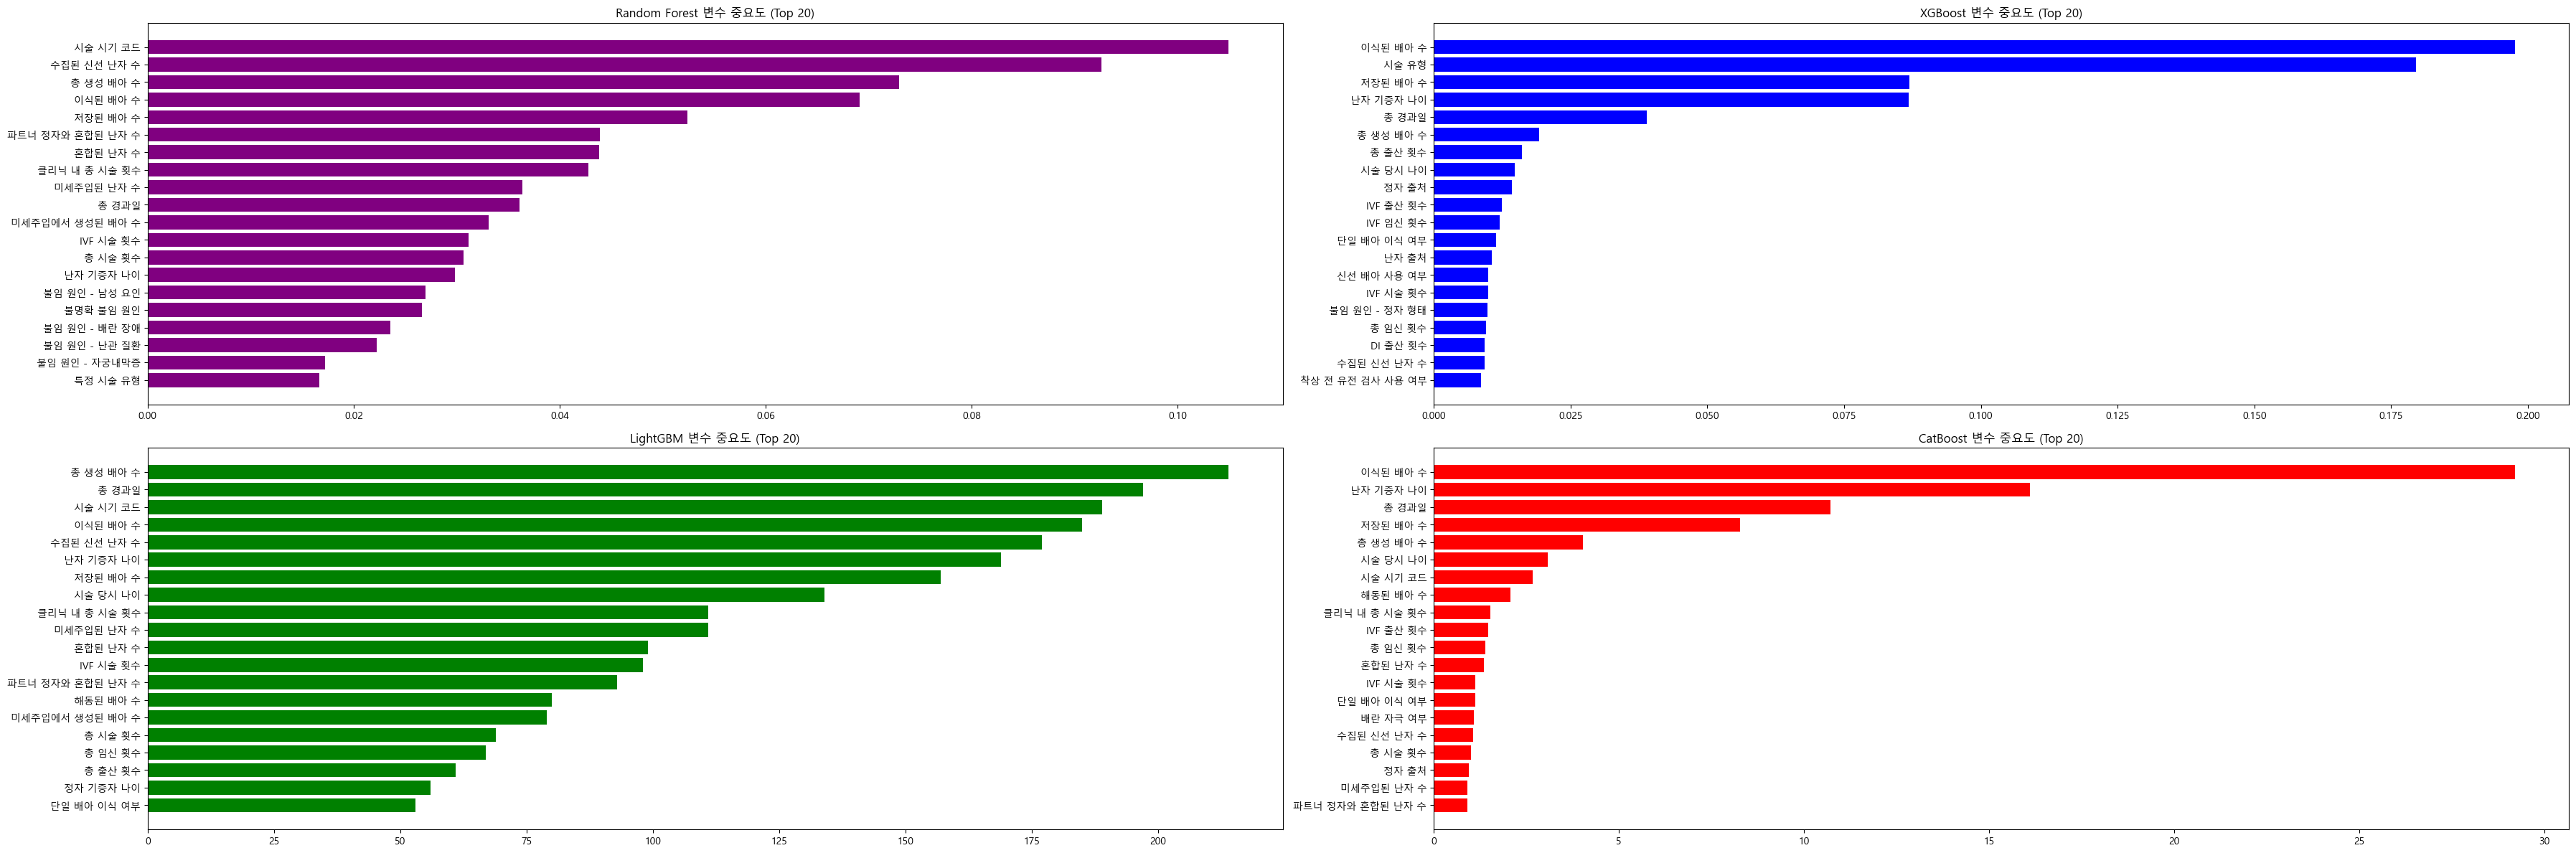

In [22]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

# 🔹 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows (맑은 고딕)
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac (애플 고딕)
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux (나눔 고딕)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 🔹 데이터 준비 (X_train_encoded 사용)
X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, y, test_size=0.2, random_state=42)

# 1️⃣ 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2️⃣ XGBoost 모델 학습
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 3️⃣ LightGBM 모델 학습
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# 4️⃣ CatBoost 모델 학습
cat_model = CatBoostRegressor(iterations=100, verbose=0, random_seed=42)
cat_model.fit(X_train, y_train)

# 🔹 변수 중요도 추출
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
lgb_importances = lgb_model.feature_importances_
cat_importances = cat_model.get_feature_importance()

feature_names = X_train.columns

# 🔹 중요도 데이터프레임 생성
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'LightGBM': lgb_importances,
    'CatBoost': cat_importances
})

# 🔹 상위 20개만 정렬하여 가져오기
top_n = 20
importance_rf = importance_df.nlargest(top_n, 'RandomForest')
importance_xgb = importance_df.nlargest(top_n, 'XGBoost')
importance_lgb = importance_df.nlargest(top_n, 'LightGBM')
importance_cat = importance_df.nlargest(top_n, 'CatBoost')

# 🔹 시각화 (각 모델별 개별 정렬)
fig, axes = plt.subplots(2, 2, figsize=(36, 12))

# Random Forest Feature Importance (상위 20개)
axes[0, 0].barh(importance_rf['Feature'], importance_rf['RandomForest'], color='purple')
axes[0, 0].set_title("Random Forest 변수 중요도 (Top 20)")
axes[0, 0].invert_yaxis()

# XGBoost Feature Importance (상위 20개)
axes[0, 1].barh(importance_xgb['Feature'], importance_xgb['XGBoost'], color='blue')
axes[0, 1].set_title("XGBoost 변수 중요도 (Top 20)")
axes[0, 1].invert_yaxis()

# LightGBM Feature Importance (상위 20개)
axes[1, 0].barh(importance_lgb['Feature'], importance_lgb['LightGBM'], color='green')
axes[1, 0].set_title("LightGBM 변수 중요도 (Top 20)")
axes[1, 0].invert_yaxis()

# CatBoost Feature Importance (상위 20개)
axes[1, 1].barh(importance_cat['Feature'], importance_cat['CatBoost'], color='red')
axes[1, 1].set_title("CatBoost 변수 중요도 (Top 20)")
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()


🔹 RandomForest 상위 50개 변수: ['시술 시기 코드', '수집된 신선 난자 수', '총 생성 배아 수', '이식된 배아 수', '저장된 배아 수', '파트너 정자와 혼합된 난자 수', '혼합된 난자 수', '클리닉 내 총 시술 횟수', '미세주입된 난자 수', '총 경과일', '미세주입에서 생성된 배아 수', 'IVF 시술 횟수', '총 시술 횟수', '난자 기증자 나이', '불임 원인 - 남성 요인', '불명확 불임 원인', '불임 원인 - 배란 장애', '불임 원인 - 난관 질환', '불임 원인 - 자궁내막증', '특정 시술 유형', '시술 당시 나이', '해동된 배아 수', '단일 배아 이식 여부', '정자 기증자 나이', '미세주입 후 저장된 배아 수', '총 임신 횟수', '미세주입 배아 이식 수', 'IVF 임신 횟수', '기증자 정자와 혼합된 난자 수', 'DI 시술 횟수', '총 출산 횟수', 'IVF 출산 횟수', '착상 전 유전 진단 사용 여부', '정자 출처', '난자 출처', '여성 주 불임 원인', '남성 주 불임 원인', '부부 주 불임 원인', '배란 자극 여부', '시술 유형', '착상 전 유전 검사 사용 여부', '배란 유도 유형', '남성 부 불임 원인', '여성 부 불임 원인', '해동 난자 수', '부부 부 불임 원인', '대리모 여부', '기증 배아 사용 여부', 'DI 임신 횟수', 'DI 출산 횟수']
🔹 XGBoost 상위 50개 변수: ['이식된 배아 수', '시술 유형', '저장된 배아 수', '난자 기증자 나이', '총 경과일', '총 생성 배아 수', '총 출산 횟수', '시술 당시 나이', '정자 출처', 'IVF 출산 횟수', 'IVF 임신 횟수', '단일 배아 이식 여부', '난자 출처', '신선 배아 사용 여부', 'IVF 시술 횟수', '불임 원인 - 정자 형태', '총 임신 횟수', 'DI 출산 횟수', '수집된 신선 난자 수', '착상 전 유전 검사 사용 여부', '클리닉 내 총 시술

<Figure size 1200x800 with 0 Axes>

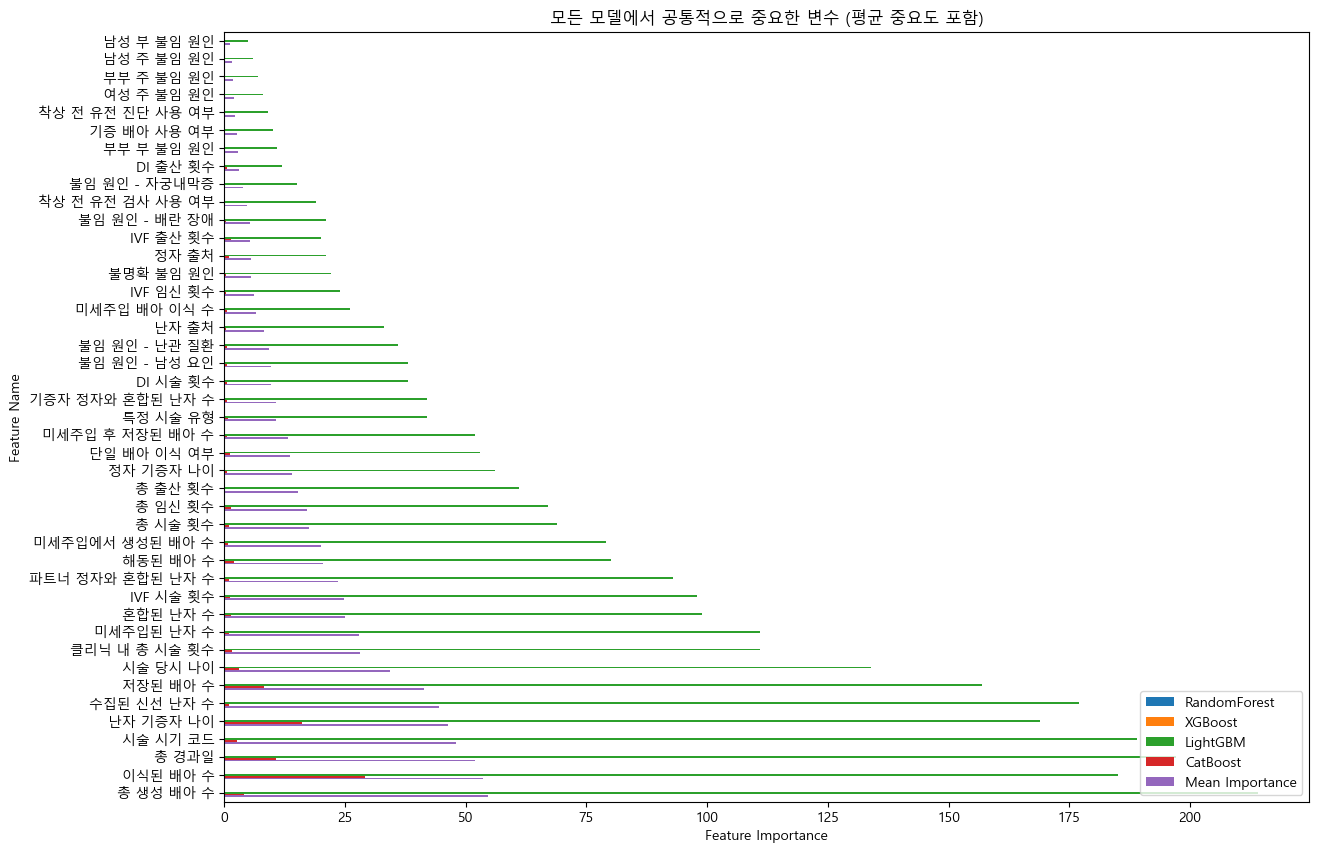

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 상위 N개의 중요한 변수 선택
top_n = 50  # 원하는 개수 지정

# 🔹 모델별로 가장 중요한 N개 변수 선택
top_rf = importance_df.nlargest(top_n, 'RandomForest')['Feature'].tolist()
top_xgb = importance_df.nlargest(top_n, 'XGBoost')['Feature'].tolist()
top_lgb = importance_df.nlargest(top_n, 'LightGBM')['Feature'].tolist()
top_cat = importance_df.nlargest(top_n, 'CatBoost')['Feature'].tolist()

# 🔹 각 모델에서 중요도가 높은 변수 출력
print(f"🔹 RandomForest 상위 {top_n}개 변수: {top_rf}")
print(f"🔹 XGBoost 상위 {top_n}개 변수: {top_xgb}")
print(f"🔹 LightGBM 상위 {top_n}개 변수: {top_lgb}")
print(f"🔹 CatBoost 상위 {top_n}개 변수: {top_cat}")

# 🔹 모든 모델에서 공통적으로 중요한 변수 찾기
common_features = list(set(top_rf) & set(top_xgb) & set(top_lgb) & set(top_cat))
print(f"⭐️ 모든 모델에서 중요한 변수: {common_features}")

# 🔹 공통 변수들의 중요도 평균 계산
top_features_df = importance_df[importance_df['Feature'].isin(common_features)].copy()
top_features_df['Mean Importance'] = top_features_df[['RandomForest', 'XGBoost', 'LightGBM', 'CatBoost']].mean(axis=1)

# 🔹 변수 중요도 수치화 출력
print("\n📊 모델별 변수 중요도 평균값:")
print(top_features_df[['Feature', 'RandomForest', 'XGBoost', 'LightGBM', 'CatBoost', 'Mean Importance']])

# 🔹 시각화 (공통 중요 변수)
plt.figure(figsize=(12, 8))
top_features_df.set_index('Feature').sort_values(by="Mean Importance").plot(kind='barh', figsize=(14, 10))
plt.title("모든 모델에서 공통적으로 중요한 변수 (평균 중요도 포함)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.gca().invert_yaxis()  # 중요도 높은 순 정렬
plt.legend(loc="lower right")
plt.show()


In [24]:
len(common_features)

43

In [25]:
X_train_encoded = X_train_encoded[common_features]

X_test_encoded = X_test_encoded[common_features]

In [26]:
# 각 열의 결측값 개수 확인
missing_values_count = X_train_encoded.isnull().sum()

# 결측값이 있는 열만 필터링
missing_columns = missing_values_count[missing_values_count > 0]

print("결측값이 있는 열과 개수:")
print(missing_columns)


결측값이 있는 열과 개수:
Series([], dtype: int64)


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터 정규화 (X_train_encoded & X_test_encoded)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)  # 동일한 스케일 적용

# DataFrame 변환 (Feature 이름 유지)
feature_names = X_train_encoded.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# 상관 행렬 계산
correlation_matrix_train = X_train_scaled_df.corr()

# 다중 공선성이 높은 칼럼 찾기 (절대 상관 계수가 0.9 이상)
threshold = 0.9
high_corr_features = set()

for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        if abs(correlation_matrix_train.iloc[i, j]) > threshold:
            high_corr_features.add(feature_names[j])  # 공선성이 높은 컬럼 추가

print(f"📌 상관 계수 기준으로 제거할 후보 변수들: {high_corr_features}")

# 📌 VIF 계산 함수
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# VIF 계산
vif_df = calculate_vif(X_train_scaled_df)

# VIF 기준(예: 10) 초과하는 변수 제거
high_vif_features = vif_df[vif_df["VIF"] > 10]["Feature"].tolist()
print(f"📌 VIF 기준으로 제거할 후보 변수들: {high_vif_features}")

# 공선성이 높은 변수 최종 제거 리스트 (상관 계수 + VIF 결합)
final_features_to_remove = set(high_corr_features) | set(high_vif_features)
print(f"📌 최종 제거할 변수들: {final_features_to_remove}")

# 다중 공선성이 높은 칼럼 제거
X_train_encoded = X_train_scaled_df.drop(columns=final_features_to_remove, errors='ignore')
test = X_test_scaled_df.drop(columns=final_features_to_remove, errors='ignore')

print(f"✅ 최종 남은 변수 개수: {X_train_encoded.shape[1]}")


📌 상관 계수 기준으로 제거할 후보 변수들: {'총 시술 횟수', '파트너 정자와 혼합된 난자 수', '총 임신 횟수', '미세주입에서 생성된 배아 수', '부부 주 불임 원인', 'IVF 출산 횟수'}
📌 VIF 기준으로 제거할 후보 변수들: ['총 출산 횟수', '남성 부 불임 원인', '부부 부 불임 원인', 'IVF 임신 횟수', '남성 주 불임 원인', '미세주입된 난자 수', 'IVF 시술 횟수', '총 임신 횟수', '혼합된 난자 수', '부부 주 불임 원인', 'IVF 출산 횟수', '파트너 정자와 혼합된 난자 수', '총 시술 횟수', 'DI 출산 횟수', '미세주입에서 생성된 배아 수', '총 생성 배아 수', 'DI 시술 횟수']
📌 최종 제거할 변수들: {'미세주입된 난자 수', 'IVF 시술 횟수', '총 출산 횟수', '총 임신 횟수', '혼합된 난자 수', '부부 주 불임 원인', '남성 부 불임 원인', '부부 부 불임 원인', 'IVF 출산 횟수', '총 시술 횟수', '파트너 정자와 혼합된 난자 수', 'IVF 임신 횟수', '남성 주 불임 원인', 'DI 출산 횟수', '미세주입에서 생성된 배아 수', '총 생성 배아 수', 'DI 시술 횟수'}
✅ 최종 남은 변수 개수: 26


In [28]:
train = pd.concat([X_train_encoded, y], axis=1)

In [29]:
import pandas as pd
from autogluon.tabular import TabularPredictor

def train_model(training_data, target_variable, config):
    """
    주어진 데이터와 하이퍼파라미터 설정을 사용하여 모델을 학습하고,
    학습된 TabularPredictor 객체를 반환합니다.
    """
    model = TabularPredictor(label=target_variable, eval_metric="roc_auc")
    model.fit(
        training_data,
        presets="best_quality",
        num_bag_folds=10,
        hyperparameters=config,
        num_stack_levels=1
    )
    return model

def save_submission(model, test_data, id_series, output_path="./Result/Submission.csv"):
    """
    테스트 데이터에 대해 확률 예측을 수행하고, 제출 파일을 생성하여 저장합니다.
    """
    # 예측 수행 (양성 클래스의 확률 사용)
    prediction_probs = model.predict_proba(test)
    submission_data = pd.DataFrame({
        "ID": id_series,
        "probability": prediction_probs[1]
    })
    submission_data.to_csv(output_path, index=False)
    print(f"Submission 생성 : {output_path}")

def show_model_info(model, training_data):
    """
    모델 리더보드를 출력합니다.
    """
    # 리더보드 출력
    lb = model.leaderboard(silent=False)
    print("모델 리더보드 :")
    print(lb)
    
def main():
    # 하이퍼파라미터 설정 (각 모델에 대해 기본 설정)
    hyperparams = {
        "GBM": {},
        "CAT": {},
        "XGB": {}
    }
    
    # 'train', 'test', 'test_id'는 이미 정의되어 있다고 가정합니다.
    target_col = "임신 성공 여부"
    
    # 모델 학습
    trained_model = train_model(train, target_col, hyperparams)
    
    # 예측 후 제출 파일 생성
    save_submission(trained_model, test, test_id)
    
    # 모델 정보 출력
    show_model_info(trained_model, train)

if __name__ == "__main__":
    main()

No path specified. Models will be saved in: "AutogluonModels\ag-20250220_080001"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.3
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          16
Memory Avail:       16.45 GB / 31.93 GB (51.5%)
Disk Space Avail:   184.10 GB / 930.76 GB (19.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=10, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdou

Submission 생성 : ./Result/Submission.csv
                 model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3   0.736097     roc_auc       3.128251   96.954765                0.029006           4.456331            3       True          8
1  WeightedEnsemble_L2   0.736097     roc_auc       3.130261   94.751548                0.031017           2.253114            2       True          4
2      CatBoost_BAG_L1   0.735884     roc_auc       0.049532   62.538080                0.049532          62.538080            1       True          2
3      LightGBM_BAG_L1   0.735546     roc_auc       2.024696   10.479579                2.024696          10.479579            1       True          1
4      CatBoost_BAG_L2   0.735458     roc_auc       3.150792  120.263374                0.051548          27.764940            2       True          6
5      LightGBM_BAG_L2   0.735399     roc_auc       3.